## Initialization of the Scripts

In [3]:
%pip install fredapi
%pip install ipympl
%pip install yfinance
%pip install mplfinance 
%pip install fear_and_greed
%pip install PyQt5

import fear_and_greed
from fredapi import Fred
import datetime
import time
import numpy as np
import yfinance as yf
import pandas as pd
import warnings
# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
from matplotlib import pyplot as plt
import mplfinance as mpf
from sp500_calc_test import Main_Calcn,MonthlyAndWeeklySIPReturnCalcn,MA_Invst_Return_Calcn,BollBandsReturnCalcn,MacdReturnCalcn,MA05MA10ReturnCalcn,MA_SIPReturnCalcn
from SIPReturnCalcn import SIPReturnCalcn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Plot US Daily Treasury Yield Curve Rates in the past 365 days (US10YT & US20YT)
## Plot historical curve of VIX in the past 365 days
## Plot historical curve of SP500 price in the past 365 days
## Plot historical curve of Nasdaq100 price in the past 365 days
## Plot historical curve of Bit Coin price in the past 365 days
### [Fear and Greed Index](https://www.cnn.com/markets/fear-and-greed?utm_source=hp)

Fear and Greed Index = 41.17,fear


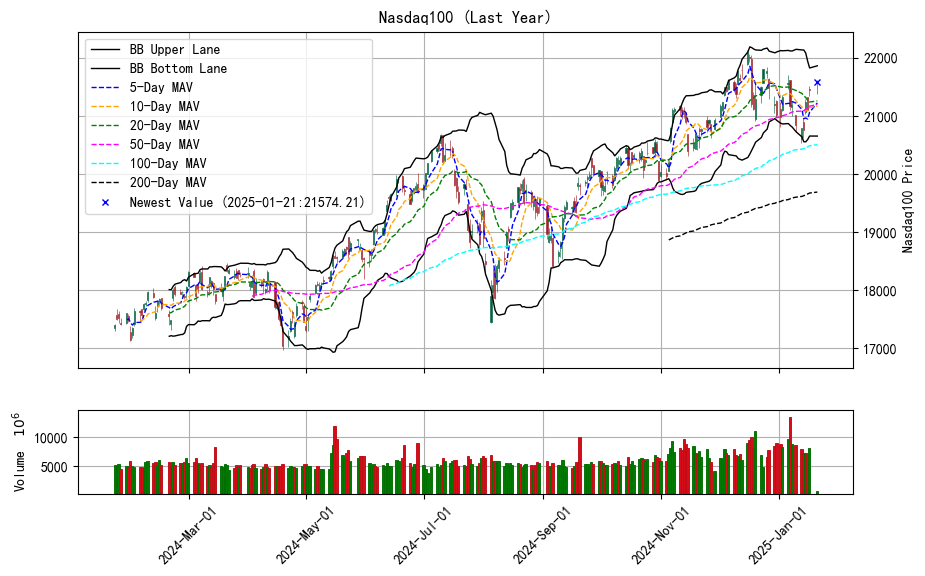

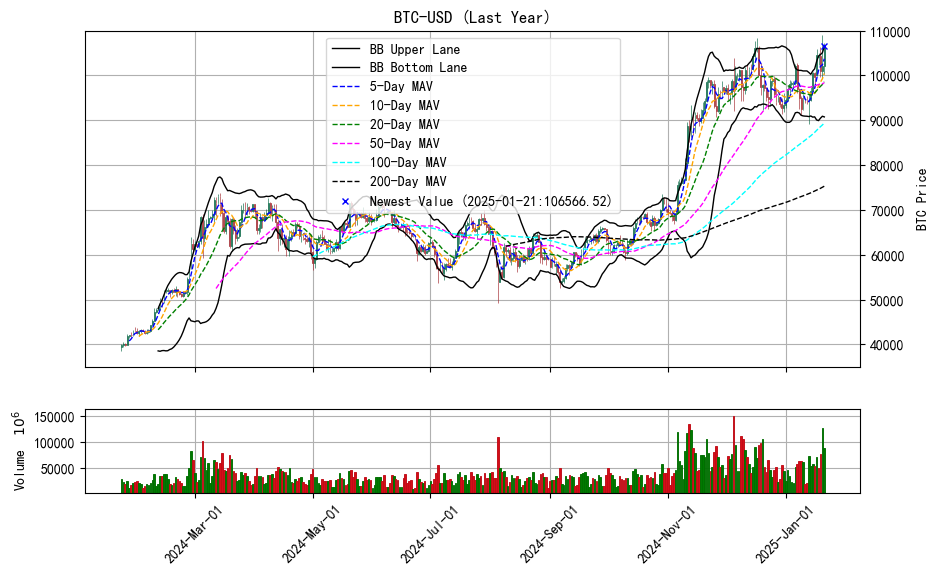

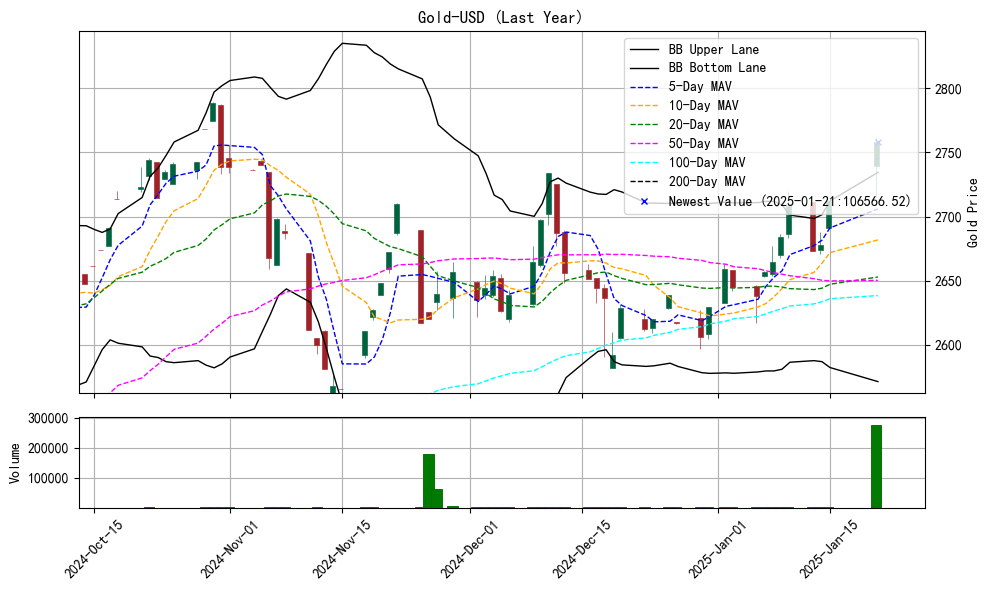

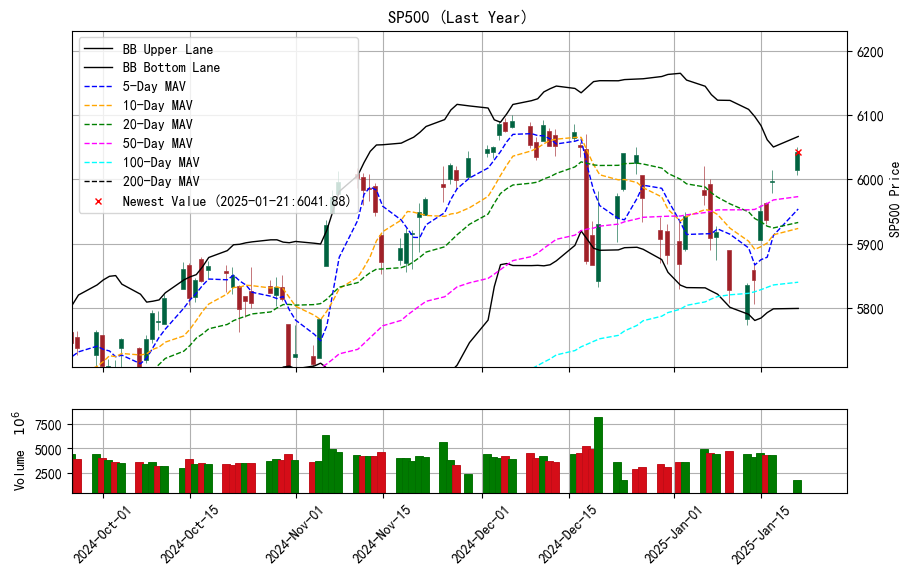

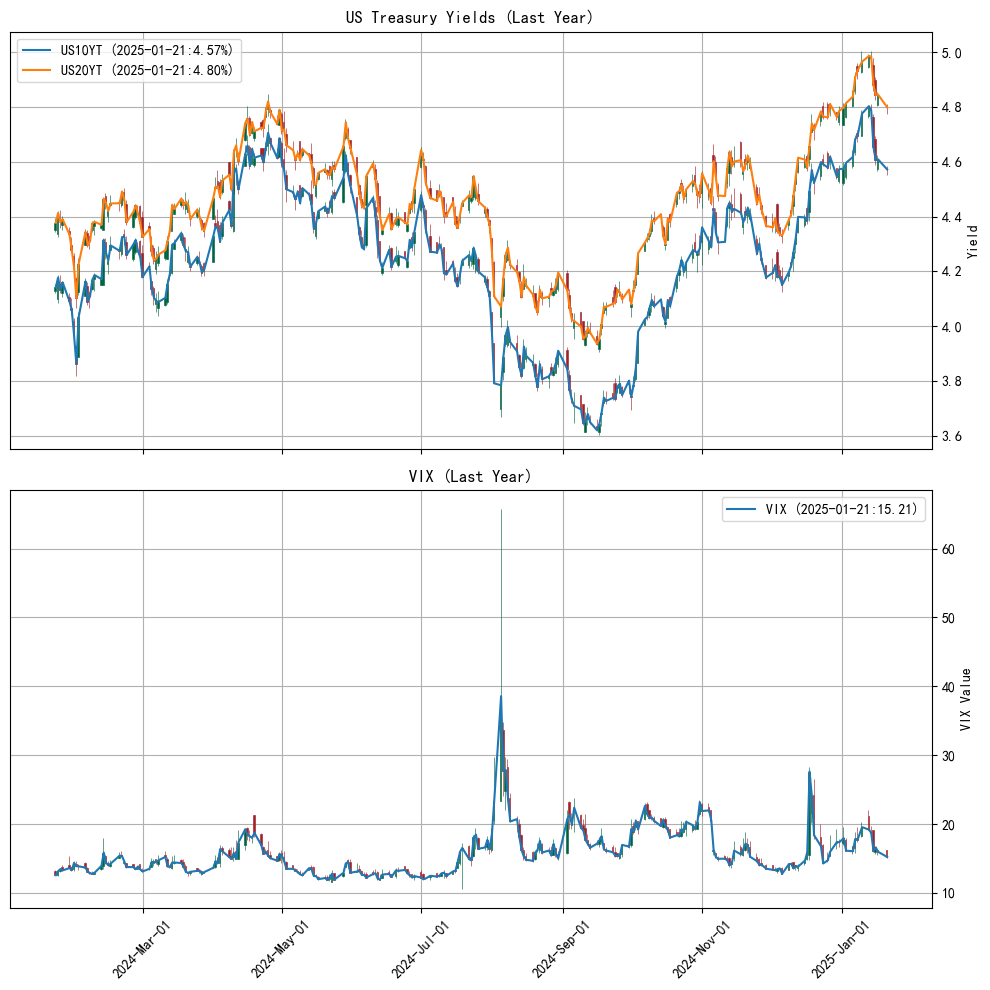

In [3]:
# 显示Fear and Greed Index
index = fear_and_greed.get()
print(f'Fear and Greed Index = {index.value:.2f},{index.description}')
# 获取 US10YT, US20YT数据
us10yt = yf.Ticker("^TNX")
us20yt = yf.Ticker("^TYX")
# 获取VIX的最新数据
vix = yf.Ticker('^VIX')

end_date = datetime.date.today() + pd.offsets.BusinessDay(1)
start_date = end_date - datetime.timedelta(days=365)

data_us10yt = us10yt.history(start=start_date, end=end_date)
data_us20yt = us20yt.history(start=start_date, end=end_date)
data_vix = vix.history(start=start_date, end=end_date)
data_sp500 = yf.Ticker("^GSPC").history(start=start_date, end=end_date)
data_nasdaq100 = yf.Ticker("^NDX").history(start=start_date, end=end_date)
data_btc = yf.Ticker("BTC-USD").history(start=start_date, end=end_date)
data_gold = yf.Ticker("GC=F").history(start=start_date, end=end_date)
# 获取最新日期的收益率
latest_date = data_us10yt.index[-1]
latest_yield_us10yt = data_us10yt['Close'][-1]
latest_yield_us20yt = data_us20yt['Close'][-1]
latest_vix = data_vix['Close'][-1]
latest_sp500 = data_sp500['Close'][-1]
latest_nasdaq100 = data_nasdaq100['Close'][-1]
latest_btc = data_btc['Close'][-1]
latest_gold = data_gold['Close'][-1]
# 绘制图表
# %matplotlib qt
%matplotlib inline
fig1, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 1]}, figsize=(10, 10),sharex=True)
mpf.plot(data_us10yt, type='candle', volume=False, ax=ax1, show_nontrading=True, returnfig=True, style='charles')
ax1.plot(data_us10yt.index, data_us10yt['Close'],label=f'US10YT ({data_us10yt.index[-1].date()}:{latest_yield_us10yt:.2f}%)')
mpf.plot(data_us20yt, type='candle', volume=False, ax=ax1, show_nontrading=True, returnfig=True, style='charles')
ax1.plot(data_us20yt.index, data_us20yt['Close'], label=f'US20YT ({data_us20yt.index[-1].date()}:{latest_yield_us20yt:.2f}%)')
ax1.set_title('US Treasury Yields (Last Year)')
ax1.set_ylabel('Yield')
ax1.legend()
ax1.grid(True)

mpf.plot(data_vix, type='candle', volume=False, ax=ax2, show_nontrading=True, returnfig=True, style='charles')
ax2.plot(data_vix.index, data_vix['Close'], label=f'VIX ({data_vix.index[-1].date()}:{latest_vix:.2f})')
ax2.set_title('VIX (Last Year)')
ax2.set_ylabel('VIX Value')
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

%matplotlib qt
fig2, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(10, 6),sharex=True)
mpf.plot(data_sp500, type='candle', volume=ax2, ax=ax1, show_nontrading=True, returnfig=True, style='charles')
ax1.plot(data_sp500.index, data_sp500['Close'].rolling(window=20).mean() + 2 * data_sp500['Close'].rolling(window=20).std(), label='BB Upper Lane', color='black', linestyle='-',linewidth=1)
ax1.plot(data_sp500.index, data_sp500['Close'].rolling(window=20).mean() - 2 * data_sp500['Close'].rolling(window=20).std(), label='BB Bottom Lane', color='black', linestyle='-',linewidth=1)
ax1.plot(data_sp500.index, data_sp500['Close'].rolling(window=5).mean(), label='5-Day MAV', color='blue', linestyle='--',linewidth=1)
ax1.plot(data_sp500.index, data_sp500['Close'].rolling(window=10).mean(), label='10-Day MAV', color='orange', linestyle='--',linewidth=1)
ax1.plot(data_sp500.index, data_sp500['Close'].rolling(window=20).mean(), label='20-Day MAV', color='green', linestyle='--',linewidth=1)
ax1.plot(data_sp500.index, data_sp500['Close'].rolling(window=50).mean(), label='50-Day MAV', color='magenta', linestyle='--',linewidth=1)
ax1.plot(data_sp500.index, data_sp500['Close'].rolling(window=100).mean(), label='100-Day MAV', color='cyan', linestyle='--',linewidth=1)
ax1.plot(data_sp500.index, data_sp500['Close'].rolling(window=200).mean(), label='200-Day MAV', color='black', linestyle='--',linewidth=1)
ax1.plot(data_sp500.index[-1], data_sp500['Close'][-1], 'rx', markersize=5,label=f'Newest Value ({data_sp500.index[-1].date()}:{latest_sp500:.2f})')
ax1.set_title('SP500 (Last Year)')
ax1.set_ylabel('SP500 Price')
ax1.legend()
ax1.grid(True)
ax2.grid(True)

fig3, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(10, 6),sharex=True)
mpf.plot(data_nasdaq100, type='candle', volume=ax2, ax=ax1, show_nontrading=True, returnfig=True, style='charles')
ax1.plot(data_nasdaq100.index, data_nasdaq100['Close'].rolling(window=20).mean() + 2 * data_nasdaq100['Close'].rolling(window=20).std(), label='BB Upper Lane', color='black', linestyle='-',linewidth=1)
ax1.plot(data_nasdaq100.index, data_nasdaq100['Close'].rolling(window=20).mean() - 2 * data_nasdaq100['Close'].rolling(window=20).std(), label='BB Bottom Lane', color='black', linestyle='-',linewidth=1)
ax1.plot(data_nasdaq100.index, data_nasdaq100['Close'].rolling(window=5).mean(), label='5-Day MAV', color='blue', linestyle='--',linewidth=1)
ax1.plot(data_nasdaq100.index, data_nasdaq100['Close'].rolling(window=10).mean(), label='10-Day MAV', color='orange', linestyle='--',linewidth=1)
ax1.plot(data_nasdaq100.index, data_nasdaq100['Close'].rolling(window=20).mean(), label='20-Day MAV', color='green', linestyle='--',linewidth=1)
ax1.plot(data_nasdaq100.index, data_nasdaq100['Close'].rolling(window=50).mean(), label='50-Day MAV', color='magenta', linestyle='--',linewidth=1)
ax1.plot(data_nasdaq100.index, data_nasdaq100['Close'].rolling(window=100).mean(), label='100-Day MAV', color='cyan', linestyle='--',linewidth=1)
ax1.plot(data_nasdaq100.index, data_nasdaq100['Close'].rolling(window=200).mean(), label='200-Day MAV', color='black', linestyle='--',linewidth=1)
ax1.plot(data_nasdaq100.index[-1], data_nasdaq100['Close'][-1], 'bx', markersize=5,label=f'Newest Value ({data_nasdaq100.index[-1].date()}:{latest_nasdaq100:.2f})')
ax1.set_title('Nasdaq100 (Last Year)')
ax1.set_ylabel('Nasdaq100 Price')
ax1.legend()
ax1.grid(True)
ax2.grid(True)

fig4, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(10, 6),sharex=True)
mpf.plot(data_btc, type='candle', volume=ax2, ax=ax1, show_nontrading=True, returnfig=True, style='charles')
ax1.plot(data_btc.index, data_btc['Close'].rolling(window=20).mean() + 2 * data_btc['Close'].rolling(window=20).std(), label='BB Upper Lane', color='black', linestyle='-',linewidth=1)
ax1.plot(data_btc.index, data_btc['Close'].rolling(window=20).mean() - 2 * data_btc['Close'].rolling(window=20).std(), label='BB Bottom Lane', color='black', linestyle='-',linewidth=1)
ax1.plot(data_btc.index, data_btc['Close'].rolling(window=5).mean(), label='5-Day MAV', color='blue', linestyle='--',linewidth=1)
ax1.plot(data_btc.index, data_btc['Close'].rolling(window=10).mean(), label='10-Day MAV', color='orange', linestyle='--',linewidth=1)
ax1.plot(data_btc.index, data_btc['Close'].rolling(window=20).mean(), label='20-Day MAV', color='green', linestyle='--',linewidth=1)
ax1.plot(data_btc.index, data_btc['Close'].rolling(window=50).mean(), label='50-Day MAV', color='magenta', linestyle='--',linewidth=1)
ax1.plot(data_btc.index, data_btc['Close'].rolling(window=100).mean(), label='100-Day MAV', color='cyan', linestyle='--',linewidth=1)
ax1.plot(data_btc.index, data_btc['Close'].rolling(window=200).mean(), label='200-Day MAV', color='black', linestyle='--',linewidth=1)
ax1.plot(data_btc.index[-1], data_btc['Close'][-1], 'bx', markersize=5,label=f'Newest Value ({data_btc.index[-1].date()}:{latest_btc:.2f})')
ax1.set_title('BTC-USD (Last Year)')
ax1.set_ylabel('BTC Price')
ax1.legend()
ax1.grid(True)
ax2.grid(True)

fig5, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(10, 6),sharex=True)
mpf.plot(data_gold, type='candle', volume=ax2, ax=ax1, show_nontrading=True, returnfig=True, style='charles')
ax1.plot(data_gold.index, data_gold['Close'].rolling(window=20).mean() + 2 * data_gold['Close'].rolling(window=20).std(), label='BB Upper Lane', color='black', linestyle='-',linewidth=1)
ax1.plot(data_gold.index, data_gold['Close'].rolling(window=20).mean() - 2 * data_gold['Close'].rolling(window=20).std(), label='BB Bottom Lane', color='black', linestyle='-',linewidth=1)
ax1.plot(data_gold.index, data_gold['Close'].rolling(window=5).mean(), label='5-Day MAV', color='blue', linestyle='--',linewidth=1)
ax1.plot(data_gold.index, data_gold['Close'].rolling(window=10).mean(), label='10-Day MAV', color='orange', linestyle='--',linewidth=1)
ax1.plot(data_gold.index, data_gold['Close'].rolling(window=20).mean(), label='20-Day MAV', color='green', linestyle='--',linewidth=1)
ax1.plot(data_gold.index, data_gold['Close'].rolling(window=50).mean(), label='50-Day MAV', color='magenta', linestyle='--',linewidth=1)
ax1.plot(data_gold.index, data_gold['Close'].rolling(window=100).mean(), label='100-Day MAV', color='cyan', linestyle='--',linewidth=1)
ax1.plot(data_gold.index, data_gold['Close'].rolling(window=200).mean(), label='200-Day MAV', color='black', linestyle='--',linewidth=1)
ax1.plot(data_gold.index[-1], data_gold['Close'][-1], 'bx', markersize=5,label=f'Newest Value ({data_gold.index[-1].date()}:{latest_gold:.2f})')
ax1.set_title('Gold-USD (Last Year)')
ax1.set_ylabel('Gold Price')
ax1.legend()
ax1.grid(True)
ax2.grid(True)
plt.tight_layout()
plt.show()


## Plot K-Curve of the specified stock in the past 365 days  

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mplfinance as mpf

# 获取指定股票数据
stock_ticker = 'LMT'
end_date = datetime.date.today() + pd.offsets.BusinessDay(1)
start_date = end_date - datetime.timedelta(days=365)
stock_data = yf.Ticker(stock_ticker).history(start=start_date, end=end_date)
latest_stock_data = stock_data['Close'][-1]

# 获取财务数据
ticker = yf.Ticker(stock_ticker)
try:
    trailing_pe = ticker.info['trailingPE']
except Exception as e:
    trailing_pe = None
try:
    forward_pe = ticker.info['forwardPE']
except Exception as e:
    forward_pe = None
try:
    price_to_book = ticker.info['priceToBook']
except Exception as e:
    price_to_book = None
try:
    peg_ratio = ticker.info['trailingPegRatio']
except Exception as e:    
    peg_ratio = None
try:
    calendar = ticker.calendar
    if 'Earnings Date' in calendar and len(calendar['Earnings Date']) > 0:
        next_earnings_date = calendar['Earnings Date'][0]
    else:
        next_earnings_date = None
except Exception as e:
    next_earnings_date = None
    
# 计算MACD
exp12 = stock_data['Close'].ewm(span=12, adjust=False).mean()
exp26 = stock_data['Close'].ewm(span=26, adjust=False).mean()
macd = exp12 - exp26
signal = macd.ewm(span=9, adjust=False).mean()

# 计算KDJ
low_list = stock_data['Low'].rolling(window=14).min()
high_list = stock_data['High'].rolling(window=14).max()
rsv = (stock_data['Close'] - low_list) / (high_list - low_list) * 100
kdj_k = rsv.ewm(com=3).mean()
kdj_d = kdj_k.ewm(com=3).mean()
kdj_j = 3 * kdj_k - 2 * kdj_d

# 计算RSI
delta = stock_data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
rsi = 100 - (100 / (1 + rs))

# 计算斐波那契回撤水平线
def fibonacci_retracement_levels(max_price, min_price):
    diff = max_price - min_price
    levels = [max_price - diff * ratio for ratio in [0, 0.236, 0.382, 0.5, 0.618, 1]]
    return levels

# 获取斐波那契回撤水平线
fib_levels = fibonacci_retracement_levels(stock_data['Close'].max(), stock_data['Close'].min())

# 绘制图表
%matplotlib qt
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, gridspec_kw={'height_ratios': [4, 1, 1, 1, 1]}, figsize=(10, 12), sharex=True)
mpf.plot(stock_data, type='candle', volume=ax2, ax=ax1, show_nontrading=True, returnfig=True, style='charles')
ax1.plot(stock_data.index, stock_data['Close'].rolling(window=20).mean() + 2 * stock_data['Close'].rolling(window=20).std(), label='BB Upper Lane', color='black', linestyle='-', linewidth=1)
ax1.plot(stock_data.index, stock_data['Close'].rolling(window=20).mean() - 2 * stock_data['Close'].rolling(window=20).std(), label='BB Bottom Lane', color='black', linestyle='-', linewidth=1)
ax1.plot(stock_data.index, stock_data['Close'].rolling(window=5).mean(), label='5-Day MAV', color='blue', linestyle='--', linewidth=1)
ax1.plot(stock_data.index, stock_data['Close'].rolling(window=10).mean(), label='10-Day MAV', color='orange', linestyle='--', linewidth=1)
ax1.plot(stock_data.index, stock_data['Close'].rolling(window=20).mean(), label='20-Day MAV', color='green', linestyle='--', linewidth=1)
ax1.plot(stock_data.index, stock_data['Close'].rolling(window=50).mean(), label='50-Day MAV', color='magenta', linestyle='--', linewidth=1)
ax1.plot(stock_data.index, stock_data['Close'].rolling(window=100).mean(), label='100-Day MAV', color='cyan', linestyle='--', linewidth=1)
ax1.plot(stock_data.index, stock_data['Close'].rolling(window=200).mean(), label='200-Day MAV', color='black', linestyle='--', linewidth=1)
ax1.plot(stock_data.index[-1], stock_data['Close'][-1], 'rx', markersize=5, label=f'Newest Value ({stock_data.index[-1].date()}:{latest_stock_data:.2f})')

# 交互功能
class FibonacciSelector:
    def __init__(self, ax):
        self.ax = ax
        self.max_price = None
        self.min_price = None
        self.cid = ax.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        if event.inaxes != self.ax:
            return
        if self.max_price is None:
            self.max_price = event.ydata
            print(f'Max price selected: {self.max_price}')
        elif self.min_price is None:
            self.min_price = event.ydata
            print(f'Min price selected: {self.min_price}')
            self.draw_fibonacci_levels()

    def draw_fibonacci_levels(self):
        levels = fibonacci_retracement_levels(self.max_price, self.min_price)
        for level in levels:
            self.ax.axhline(y=level, color='gray', linestyle='--', linewidth=1)
            self.ax.text(stock_data.index[-1], level, f'{level:.2f}', color='gray', fontsize=8)
        self.ax.figure.canvas.draw()

fib_selector = FibonacciSelector(ax1)

ax1.set_title(f'K-Curve of {stock_ticker} in last year\nTrailing PE: {trailing_pe}, Forward PE: {forward_pe}, PriceToBook: {price_to_book}, PEG Ratio: {peg_ratio}, Next Earnings Date: {next_earnings_date}')
ax1.set_ylabel('Stock Price')
ax1.legend()
ax1.grid(True)
ax2.grid(True)

# 绘制MACD
ax3.plot(stock_data.index, macd, label='MACD', color='blue')
ax3.plot(stock_data.index, signal, label='Signal Line', color='red')
ax3.set_ylabel('MACD')
ax3.legend()
ax3.grid(True)

# 绘制KDJ
ax4.plot(stock_data.index, kdj_k, label='K', color='blue')
ax4.plot(stock_data.index, kdj_d, label='D', color='orange')
ax4.plot(stock_data.index, kdj_j, label='J', color='green')
ax4.axhline(y=20, color='gray', linestyle='--', linewidth=1) 
ax4.axhline(y=80, color='gray', linestyle='--', linewidth=1)
ax4.set_ylabel('KDJ')
ax4.legend()
ax4.grid(True)

# 绘制RSI
ax5.plot(stock_data.index, rsi, label='RSI', color='purple')
ax5.axhline(y=30, color='gray', linestyle='--', linewidth=1) 
ax5.axhline(y=70, color='gray', linestyle='--', linewidth=1)
ax5.set_ylabel('RSI')
ax5.legend()
ax5.grid(True)

plt.tight_layout()
plt.show()


Max price selected: 614.3438845430953
Min price selected: 461.67179890577205


## 计算指定股票在过去365天中用不同投资策略下的收益率

[*********************100%***********************]  1 of 1 completed


按月定投收益率 %:-19.5
按周定投收益率 %:-21.3


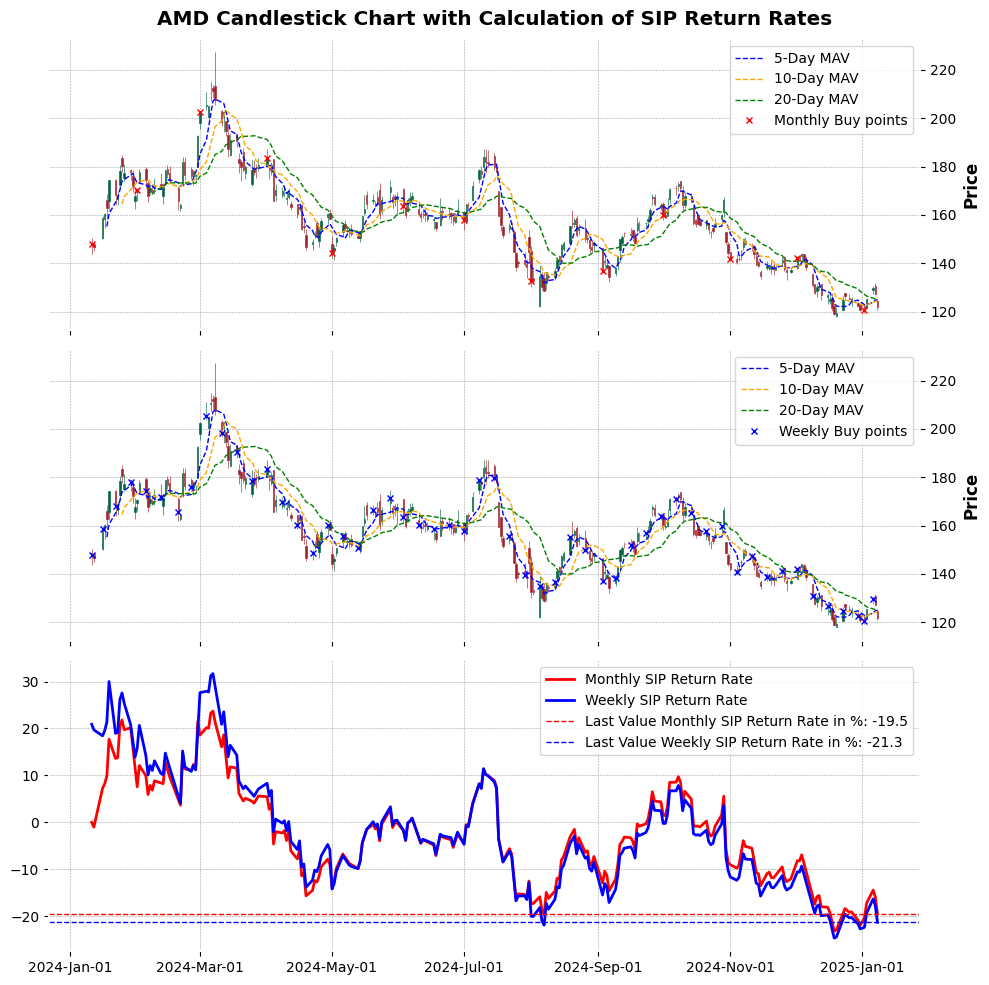

按MA5定投收益率 %:-21.7
按MA10定投收益率 %:-21.9
按MA20定投收益率 %:-23.2
按MA5和MA10的交叉定投收益率 %:-19.7
按MA10和MA20的交叉定投收益率 %:-25.9


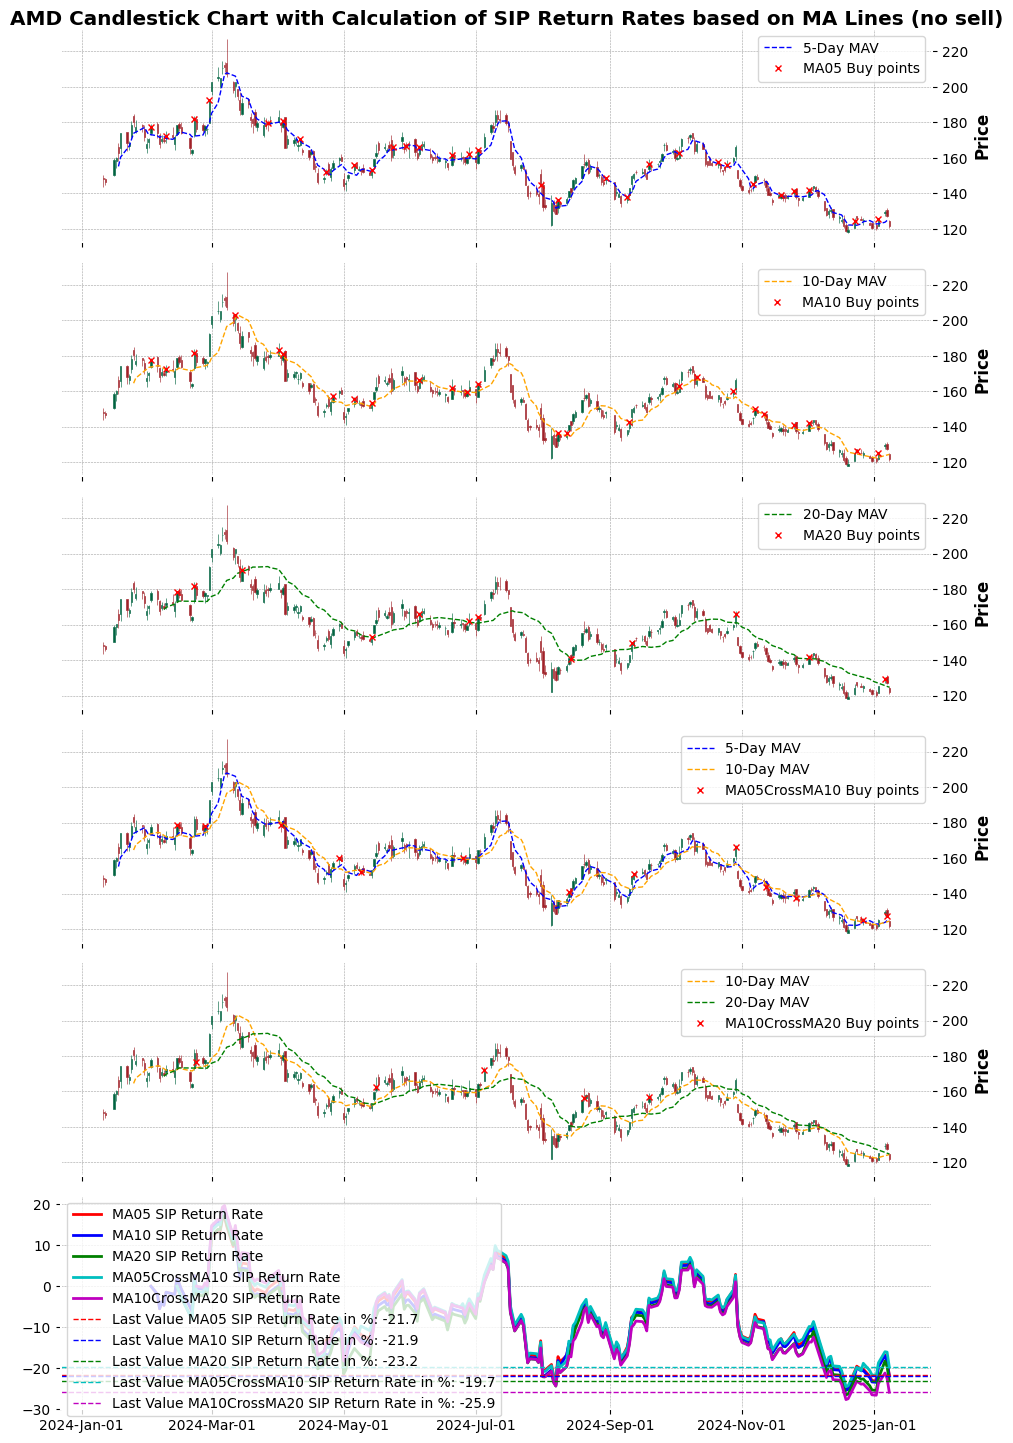

按MA5定投收益率 %:-26.9
按MA10定投收益率 %:-26.7
按MA20定投收益率 %:-24.5
按MA5和MA10的交叉定投收益率 %:-19.1


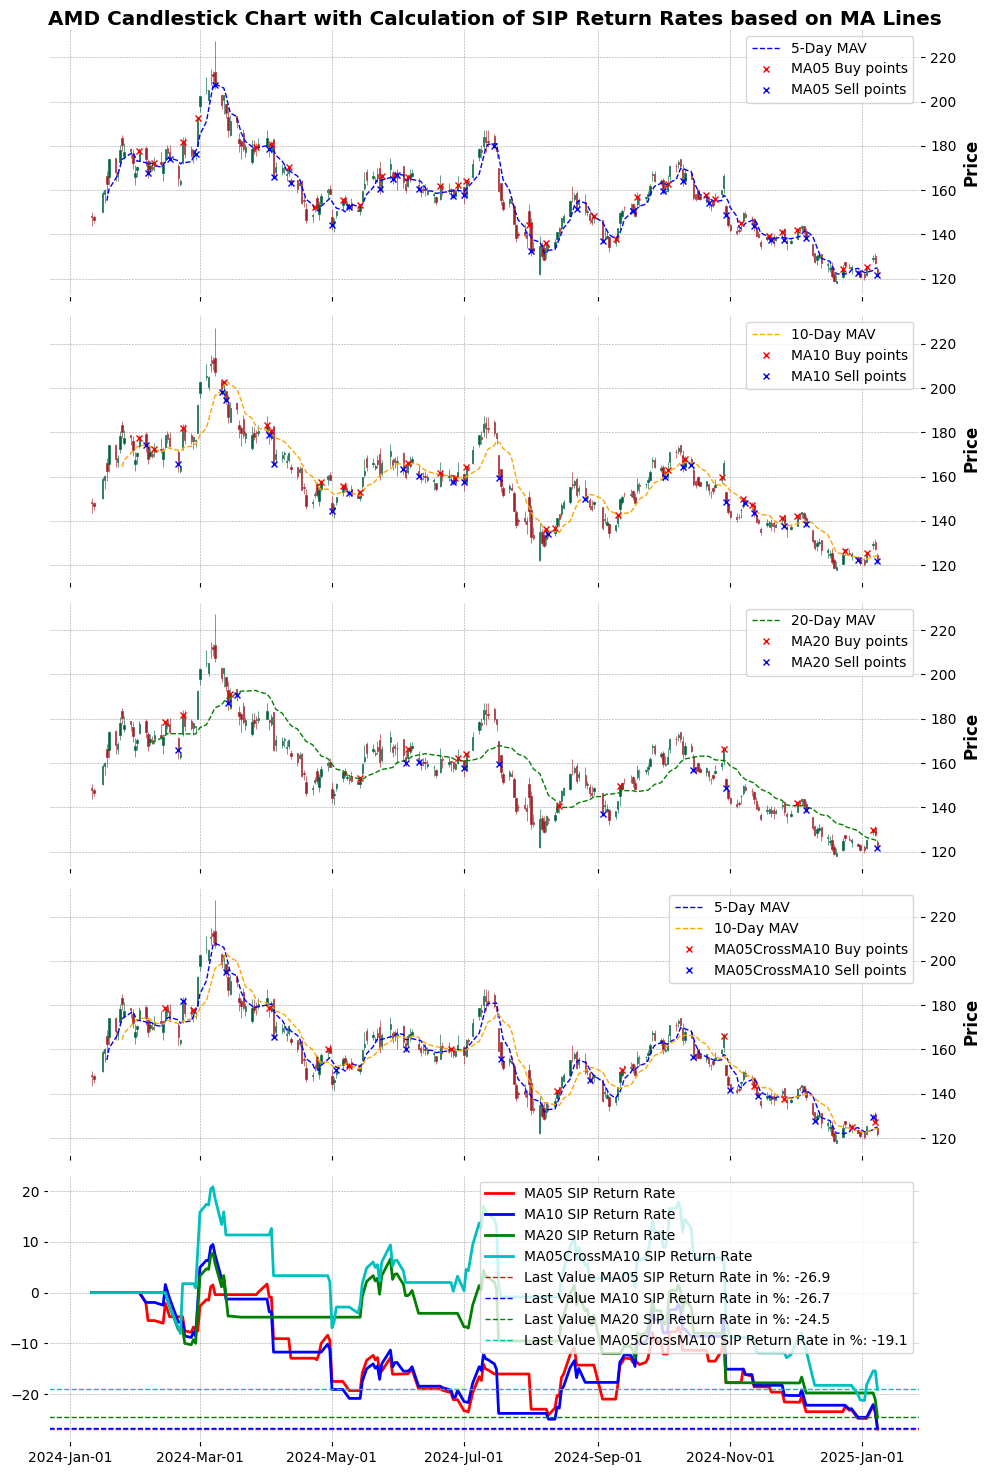

按BB上下轨投资收益率 %:9.8


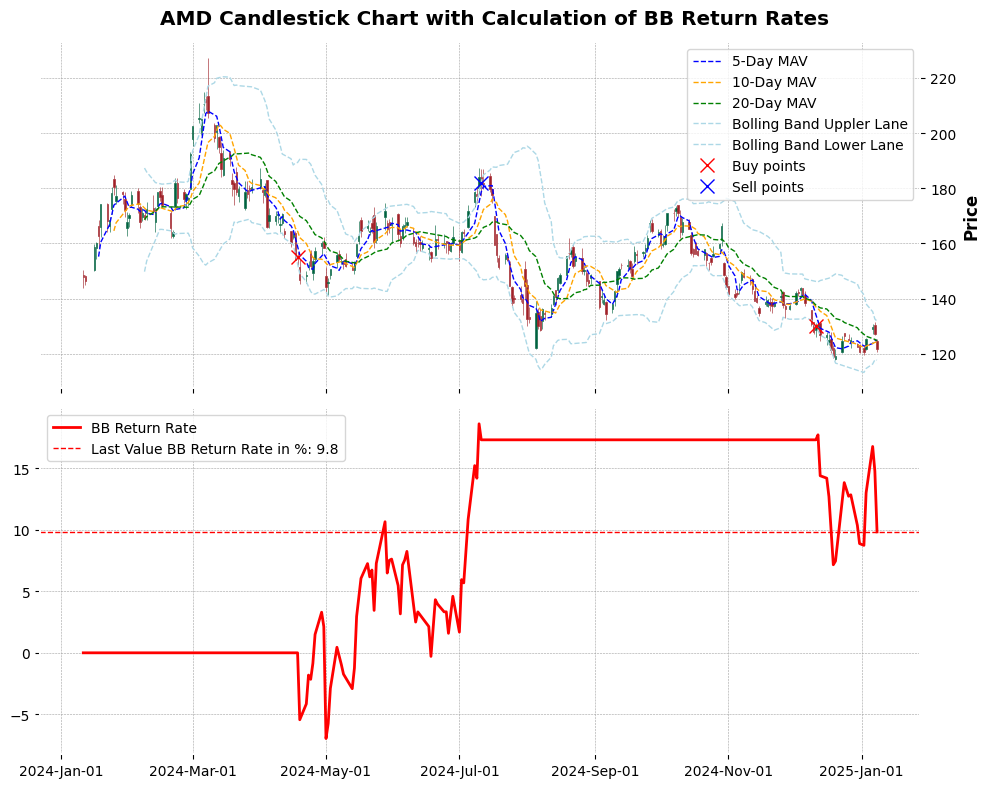

按MACD金叉死叉投资收益率 %:-8.6


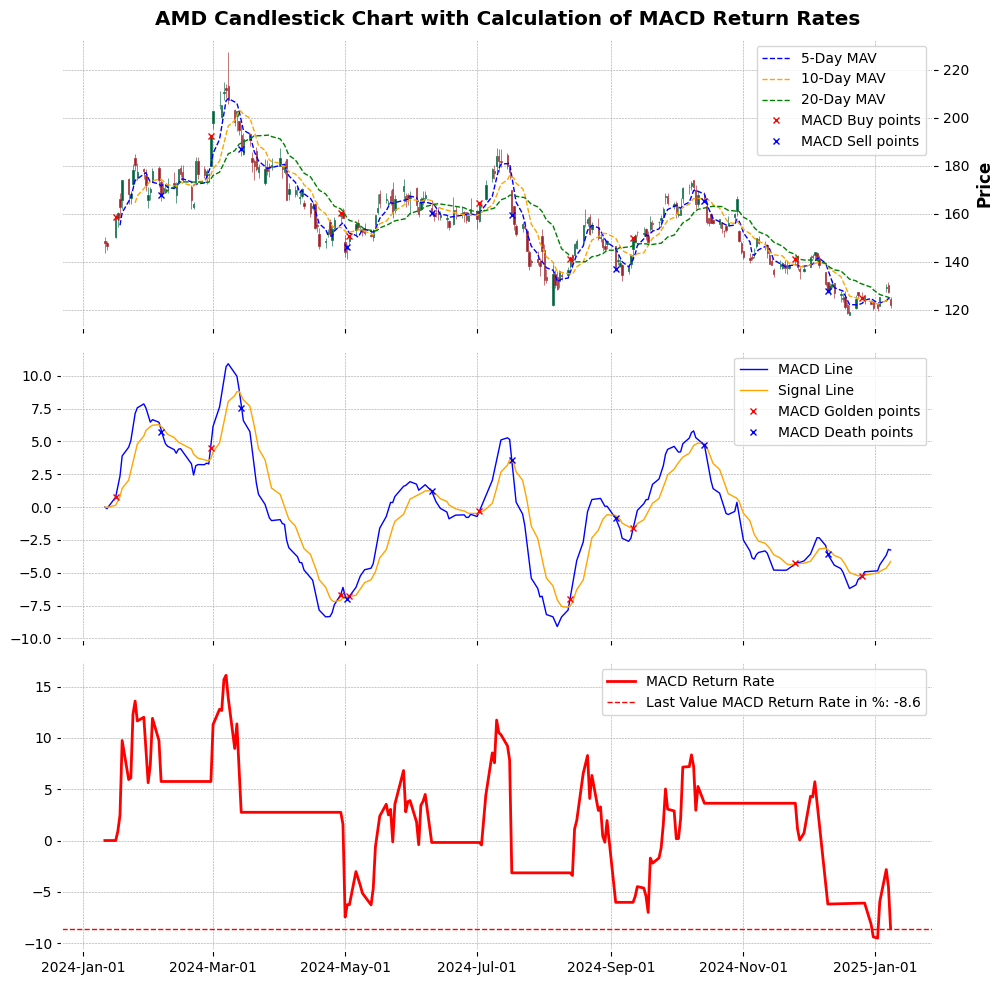

In [142]:
%matplotlib inline
end_date = datetime.date.today() + pd.offsets.BusinessDay(1)
start_date = end_date - datetime.timedelta(days=365)
SIPReturnCalcn('AMD',start_date,end_date)

## 计算SP500里所有股票用不同投资策略的投资回报率并保存结果到csv文件中

In [6]:
end_date = datetime.date.today() + pd.offsets.BusinessDay(1)
start_date = end_date - datetime.timedelta(days=365)
ReturnRateRes = Main_Calcn(start_date,end_date)
ReturnRateRes.to_csv('ReturnRateRes.csv',index=True)


Elapsed time: 1.5490 seconds
Elapsed time: 1.5430 seconds
Elapsed time: 1.5470 seconds
Elapsed time: 1.6300 seconds
Elapsed time: 1.6780 seconds
Elapsed time: 1.6000 seconds
Elapsed time: 1.6270 seconds
Elapsed time: 1.5830 seconds
Elapsed time: 1.6330 seconds
Elapsed time: 1.6370 seconds
Elapsed time: 1.6010 seconds
Elapsed time: 1.5480 seconds
Elapsed time: 1.5900 seconds
Elapsed time: 1.5940 seconds
Elapsed time: 1.5960 seconds
Elapsed time: 1.6210 seconds
Elapsed time: 1.6330 seconds
Elapsed time: 1.7130 seconds
Elapsed time: 1.6160 seconds
Elapsed time: 1.6045 seconds
Elapsed time: 1.6030 seconds
Elapsed time: 1.5770 seconds
Elapsed time: 1.6415 seconds
Elapsed time: 1.7081 seconds
Elapsed time: 1.6986 seconds
Elapsed time: 1.5870 seconds
Elapsed time: 1.6130 seconds
Elapsed time: 1.5940 seconds
Elapsed time: 1.5838 seconds
Error on BollBandsReturnCalcn: index 0 is out of bounds for axis 0 with size 0
Error on BollBandsReturnCalcn for AMGN: cannot access local variable 'golden_cro

## 显示SP500里所有股票用不同投资策略的投资回报率的排序以及列出目前股价最接近布林带下限的股票

In [7]:
ReturnRateRes = pd.read_csv('ReturnRateRes.csv')
# 月定投
top_20 = ReturnRateRes.sort_values(by='Return Rate of MonthlySIP',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of MonthlySIP']].to_string(index=False)
print(f'按照月定投收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# 周定投
top_20 = ReturnRateRes.sort_values(by='Return Rate of WeeklySIP',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of WeeklySIP']].to_string(index=False)
print(f'按照周定投收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# MA05
top_20 = ReturnRateRes.sort_values(by='Return Rate of MA05',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of MA05']].to_string(index=False)
print(f'按照5日均线金叉死叉交易收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# MA10
top_20 = ReturnRateRes.sort_values(by='Return Rate of MA10',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of MA10']].to_string(index=False)
print(f'按照10日均线金叉死叉交易收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# MA20
top_20 = ReturnRateRes.sort_values(by='Return Rate of MA20',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of MA20']].to_string(index=False)
print(f'按照20日均线金叉死叉交易收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# MA5CrossMA10
top_20 = ReturnRateRes.sort_values(by='Return Rate of MA5CrossMA10',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of MA5CrossMA10']].to_string(index=False)
print(f'按照5日10日均线金叉死叉交易收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# 最佳买入时机股票
top_20 = ReturnRateRes.sort_values(by='Distance of Close2BBLowerLim',ascending=True).head(20)
top_20_indices_and_values = top_20[['Ticker','Distance of Close2BBLowerLim']].to_string(index=False)
print(f'距离布林带下轨距离最小的股票(TOP20)列表如下:\n{top_20_indices_and_values}')

按照月定投收益最高的公司(TOP20)列表如下:
 Ticker  Return Rate of MonthlySIP
   PLTR                 166.889590
    VST                 125.666331
    UAL                 106.744800
    TPL                 101.070578
  XIACF                  98.946197
    GEV                  98.880842
   TSLA                  94.904726
   AXON                  76.859864
   TRGP                  74.136807
    CEG                  69.734304
BTC-USD                  69.443528
   AVGO                  61.348494
    TPR                  58.476392
    HWM                  57.840835
    RCL                  55.089433
   XPEV                  53.370336
   ANET                  48.756510
    KMI                  48.458115
    SYF                  46.379758
    CCL                  46.335449
按照周定投收益最高的公司(TOP20)列表如下:
 Ticker  Return Rate of WeeklySIP
   PLTR                141.025286
    VST                106.763225
    UAL                 99.381437
    GEV                 93.880179
   TSLA                 93.010327
  XIACF    

In [14]:
print(ReturnRateRes.columns)


Index(['Ticker', 'Return Rate of MA05', 'Return Rate of MA10',
       'Return Rate of MA20', 'Return Rate of MonthlySIP',
       'Return Rate of WeeklySIP', 'Distance of Close2BBLowerLim',
       'Return Rate of MA5CrossMA10', 'Return Rate of MA05_WoSell',
       'Return Rate of MA10_WoSell', 'Return Rate of MA20_WoSell',
       'Return Rate of MA05CrossMA10_WoSell',
       'Return Rate of MA10CrossMA20_WoSell', 'Return Rate of MACD',
       'Return Rate of BB'],
      dtype='object')
